# Author: Swaroop Srisailam

## Importing Dependencies

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## Reading Data

In [37]:
train=pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")

In [38]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

`So we have 137 records and 43 features`
`There are no null values in the training data`

In [40]:
train.drop(columns=['Id','Open Date','City','Type'],inplace=True)


In [43]:
label_encoder = preprocessing.LabelEncoder()
train["City Group"] = label_encoder.fit_transform(train["City Group"])

In [44]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28']

scaler = MinMaxScaler()
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [45]:
train.head()

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,0.272727,0.615385,0.533333,0.222222,0.142857,0.111111,0.444444,0.333333,0.166667,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,0,0.272727,0.615385,0.533333,0.222222,0.000000,0.111111,0.444444,0.444444,0.166667,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,1,0.090909,0.461538,0.266667,0.444444,0.142857,0.222222,0.444444,0.444444,0.166667,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,1,0.454545,0.538462,0.800000,0.666667,0.428571,0.333333,1.000000,0.777778,1.000000,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,1,0.181818,0.461538,0.400000,0.222222,0.142857,0.111111,0.444444,0.444444,0.166667,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [47]:
from sklearn.model_selection import train_test_split

X = train.drop('revenue', axis=1)
y = train['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [49]:
print("Mean Squared Error (Linear Regression):", mse_linear)

Mean Squared Error (Linear Regression): 19875639708032.023


In [50]:
# 2. Multiple Linear Regression
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X_train, y_train)
y_pred_multiple_linear = multiple_linear_model.predict(X_test)
mse_multiple_linear = mean_squared_error(y_test, y_pred_multiple_linear)

In [51]:
print("Mean Squared Error (Multiple Linear Regression):", mse_multiple_linear)

Mean Squared Error (Multiple Linear Regression): 19875639708032.023


In [52]:
# 3. Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

In [53]:
print("Mean Squared Error (Polynomial Regression):", mse_poly)

Mean Squared Error (Polynomial Regression): 256893747387220.72


In [54]:
# 4. Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)

In [55]:
print("Mean Squared Error (Decision Tree Regression):", mse_decision_tree)

Mean Squared Error (Decision Tree Regression): 10188186727032.857


In [56]:
# 5. Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

In [57]:
print("Mean Squared Error (Random Forest Regression):", mse_random_forest)

Mean Squared Error (Random Forest Regression): 10751507530897.848


In [58]:
feature_importances = random_forest_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

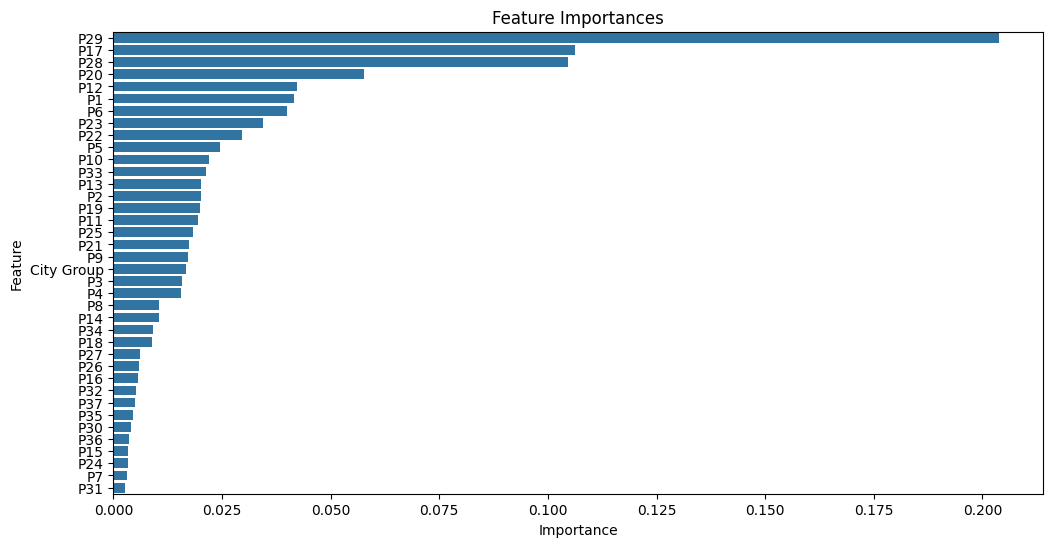

In [59]:
# Visualizing feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [67]:
k = 4
selected_features = feature_importance_df['Feature'][:k]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

new_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
new_rf_model.fit(X_train_selected, y_train)

y_pred_new_rf = new_rf_model.predict(X_test_selected)

mse_new_rf = mean_squared_error(y_test, y_pred_new_rf)
print("Mean Squared Error (New Random Forest Model):", mse_new_rf)


Mean Squared Error (New Random Forest Model): 10558346549333.34


C:\Users\Msc 2\AppData\Local\Temp\ipykernel_10812\2317258710.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  selected_features = feature_importance_df['Feature'][:k]


In [68]:
print("Mean Squared Error (Original Random Forest Model):", mse_random_forest)
print("Mean Squared Error (New Random Forest Model with Selected Features):", mse_new_rf)

Mean Squared Error (Original Random Forest Model): 10751507530897.848
Mean Squared Error (New Random Forest Model with Selected Features): 10558346549333.34
